In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [66]:
train = pd.read_csv(r"C:\Users\user\OneDrive\문서\과제\2024-2\아이펠\aiffel-ds-3-house-prices\train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000
3,239,20,RL,93.0,12030,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,318000
4,891,50,RL,60.0,8064,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,2000,7,2007,WD,Normal,122900


In [67]:
test = pd.read_csv(r"C:\Users\user\OneDrive\문서\과제\2024-2\아이펠\aiffel-ds-3-house-prices\test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,86,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1,227,60,RL,82.0,9950,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Abnorml
2,492,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal
3,64,70,RM,50.0,10300,Pave,NaN,IR1,Bnk,AllPub,...,0,0,NaN,GdPrv,NaN,0,4,2010,WD,Normal
4,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml


In [68]:
submission = pd.read_csv(r"C:\Users\user\OneDrive\문서\과제\2024-2\아이펠\aiffel-ds-3-house-prices\sample_submission.csv")
submission.head()

,Id,SalePrice
0,86,0
1,227,0
2,492,0
3,64,0
4,576,0


<function matplotlib.pyplot.show(close=None, block=None)>

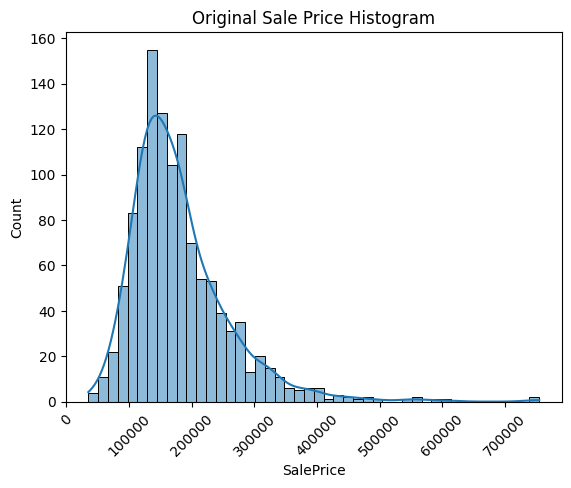

In [69]:
#정규분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Original Sale Price Histogram')
plt.xticks(rotation = 45)
sns.histplot(train['SalePrice'], kde=True)
plt.show

In [70]:
#유의미할것 같은 컬럼 선택
selected_columns = [
    "Id", "GrLivArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GarageArea", "LotArea", "LotFrontage",
    "FullBath", "HalfBath", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "OverallQual", "OverallCond",
    "YearBuilt", "YearRemodAdd", "Neighborhood", "Condition1", "Condition2", "ExterQual",
    "BsmtQual", "KitchenQual", "GarageQual", "SaleCondition", "SaleType", "SalePrice"
]

filtered_train = train[selected_columns]

In [71]:
# 숫자형 컬럼 확인
numeric_columns = filtered_train.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['Id', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea',
       'LotArea', 'LotFrontage', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'SalePrice'],
      dtype='object')

In [72]:
# 숫자형 Null 값 평균으로 대체
filtered_train[numeric_columns] = filtered_train[numeric_columns].fillna(filtered_train[numeric_columns].mean())
# 결과 확인
filtered_train.head()

C:\Users\user\AppData\Local\Temp\ipykernel_26744\1328105000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train[numeric_columns] = filtered_train[numeric_columns].fillna(filtered_train[numeric_columns].mean())


,Id,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,LotArea,LotFrontage,FullBath,HalfBath,...,Neighborhood,Condition1,Condition2,ExterQual,BsmtQual,KitchenQual,GarageQual,SaleCondition,SaleType,SalePrice
0,968,1098,1098,1098,0,260,7390,70.058947,1,0,...,NAmes,Norm,Norm,TA,TA,TA,TA,Normal,WD,135000
1,739,1200,1200,1200,0,0,10800,60.000000,3,0,...,Edwards,Norm,Norm,TA,Gd,TA,NaN,Alloca,WD,179000
2,696,1137,1112,1137,0,551,13811,54.000000,2,0,...,Timber,Norm,Norm,TA,Gd,Gd,TA,Normal,WD,176000
3,239,1694,1694,1694,0,818,12030,93.000000,2,0,...,NridgHt,Norm,Norm,Ex,Ex,Gd,TA,Partial,New,318000
4,891,924,672,672,252,576,8064,60.000000,1,0,...,NAmes,Artery,Norm,TA,TA,TA,TA,Normal,WD,122900


In [73]:
# 문자열(범주형) 컬럼 확인
categorical_columns = filtered_train.select_dtypes(include=['object']).columns

# 원-핫 인코딩 수행
filtered_train_encoded = pd.get_dummies(filtered_train, columns=categorical_columns, drop_first=True)
# 결과 확인
filtered_train_encoded.head()

,Id,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,LotArea,LotFrontage,FullBath,HalfBath,...,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,968,1098,1098,1098,0,260,7390,70.058947,1,0,...,True,False,False,False,False,False,False,False,False,True
1,739,1200,1200,1200,0,0,10800,60.000000,3,0,...,False,False,False,False,False,False,False,False,False,True
2,696,1137,1112,1137,0,551,13811,54.000000,2,0,...,True,False,False,False,False,False,False,False,False,True
3,239,1694,1694,1694,0,818,12030,93.000000,2,0,...,False,True,False,False,False,False,False,True,False,False
4,891,924,672,672,252,576,8064,60.000000,1,0,...,True,False,False,False,False,False,False,False,False,True


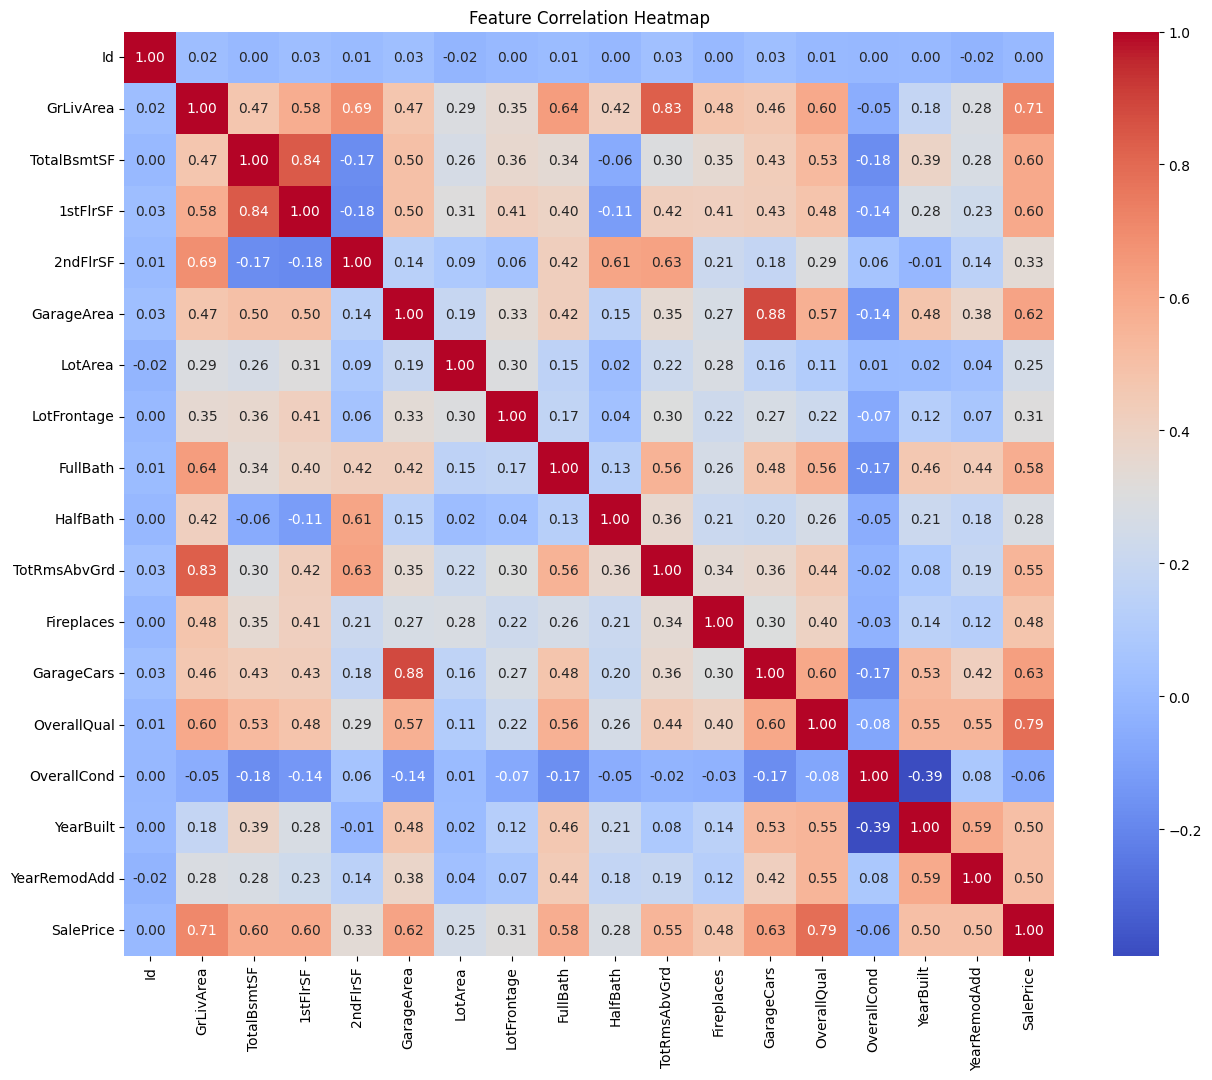

In [74]:
# 숫자형 변수 선택
numeric_features = filtered_train_encoded.select_dtypes(include=['float64', 'int64']).columns

# 상관관계 행렬 계산
correlation_matrix = filtered_train_encoded[numeric_features].corr()

# 히트맵 사이즈 설정
plt.figure(figsize=(15, 12))

# 히트맵 그리기
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# 그래프 타이틀 설정
plt.title('Feature Correlation Heatmap')

# 히트맵 표시
plt.show()

In [75]:
numeric_columns = filtered_train_encoded.select_dtypes(include=['float64', 'int64']).columns
data_range = filtered_train_encoded[numeric_columns].agg(['min', 'max'])

In [76]:
data_range

,Id,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,LotArea,LotFrontage,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,OverallQual,OverallCond,YearBuilt,YearRemodAdd,SalePrice
min,1,334,0,334,0,0,1300,21.0,0,0,2,0,0,1,1,1872,1950,34900
max,1460,5642,6110,4692,2065,1418,164660,313.0,3,2,14,3,4,10,9,2010,2010,755000


In [77]:
filtered_train_encoded['SalePrice'] = np.log1p(filtered_train_encoded['SalePrice'])

In [78]:
from sklearn.preprocessing import StandardScaler
# SalePrice는 제외
numeric_columns = numeric_columns.drop('SalePrice')  


In [79]:
from sklearn.model_selection import train_test_split

# 특성과 목표 변수 분리
X = filtered_train_encoded.drop(columns=['SalePrice'])
y = filtered_train_encoded['SalePrice']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)


In [80]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# 모델 초기화
lr_model = LinearRegression()
ridge_model = Ridge(alpha=10)  # alpha는 정규화 강도, 필요시 조정
lasso_model = Lasso(alpha=0.001)  # alpha는 정규화 강도, 필요시 조정

# 모델 학습
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# 예측
lr_pred = lr_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

# RMSE 계산
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

# 결과 출력
print(f"Linear Regression RMSE: {lr_rmse:.4f}")
print(f"Ridge Regression RMSE: {ridge_rmse:.4f}")
print(f"Lasso Regression RMSE: {lasso_rmse:.4f}")


Linear Regression RMSE: 0.1340
Ridge Regression RMSE: 0.1352
Lasso Regression RMSE: 0.1358


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.710e-01, tolerance: 1.486e-02
  model = cd_fast.enet_coordinate_descent(


In [81]:
# Debugging cell for feature mismatch issue
missing_features = set(X_train.columns) - set(X_test.columns)
extra_features = set(X_test.columns) - set(X_train.columns)
print('Missing features in test set:', missing_features)
print('Extra features in test set:', extra_features)


Missing features in test set: set()
Extra features in test set: set()


In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV, LassoCV

# alpha 값의 후보
ridge_alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
lasso_alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]

# RidgeCV와 LassoCV를 사용한 5폴드 교차검증
ridge_cv_model = RidgeCV(alphas=ridge_alphas, cv=5, scoring='neg_mean_squared_error')
lasso_cv_model = LassoCV(alphas=lasso_alphas, cv=5, random_state=42)

# 모델 학습
ridge_cv_model.fit(X_train, y_train)
lasso_cv_model.fit(X_train, y_train)

# 최적 alpha와 평균 RMSE
ridge_best_alpha = ridge_cv_model.alpha_
lasso_best_alpha = lasso_cv_model.alpha_

ridge_best_rmse = np.sqrt(-ridge_cv_model.best_score_)
lasso_best_rmse = np.sqrt(mean_squared_error(y_train, lasso_cv_model.predict(X_train)))

# 결과 출력
print(f"Ridge: Best alpha = {ridge_best_alpha}, Best RMSE = {ridge_best_rmse:.4f}")
print(f"Lasso: Best alpha = {lasso_best_alpha}, Best RMSE = {lasso_best_rmse:.4f}")


Ridge: Best alpha = 10.0, Best RMSE = 0.1671
Lasso: Best alpha = 0.001, Best RMSE = 0.1457


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.044765677527070835, tolerance: 0.011837424451595776
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0513389534605357, tolerance: 0.011837424451595776
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7795864473339913, tolerance: 0.011837424451595776
  model = cd_fast.enet_coordinate_descent

In [83]:
# 데이터 준비
X_train = filtered_train_encoded.drop('SalePrice', axis=1)
y_train = filtered_train_encoded['SalePrice']

X_test = test.fillna(0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  # 피처 정렬 및 누락 채우기

# 모델 학습 및 예측
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)
log_pred = model.predict(X_test)

pred = np.expm1(log_pred) 

In [84]:
submission = pd.DataFrame({'id': test['Id'], 'SalePrice': pred})
submission.head()

,id,SalePrice
0,86,224892.414768
1,227,227610.180927
2,492,134168.873749
3,64,136864.463756
4,576,99262.731929
